Importing the libraries:

In [1]:
from mpl_toolkits.mplot3d import Axes3D #Library for plotting 3D plots

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

Declaring variables and plotting initial conditions:

C:\Users\rajat\AppData\Local\Temp\ipykernel_19772\3924144928.py:25: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


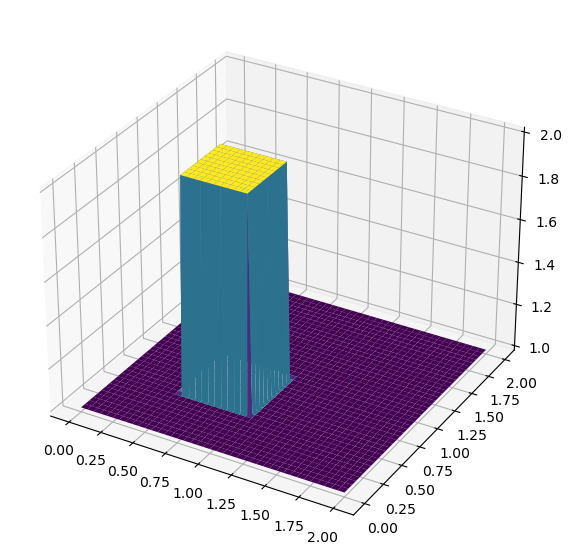

In [3]:
#Variable declarations

nx = 81
ny = 81
nt = 100
c = 1
dx = 2/(nx-1)
dy = 2/(ny-1)
sigma = 0.2
dt = sigma*dx

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((ny,nx)) #Create a matrix of 1's
un = np.ones((ny,nx))

#Assign initial conditions

#Set hat function I.C.: u(0.5<=x<=1 && 0.5<=y<=1) is 2
u[int(0.5/dy):int(1/dy+1),int(0.5/dx):int(1/dy+1)] = 2

#Plot initial conditions
fig = plt.figure(figsize=(11,7),dpi=100)
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,u[:],cmap=cm.viridis)

Evaluating the function values using NumPy arrays:

C:\Users\rajat\AppData\Local\Temp\ipykernel_19772\1637608401.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


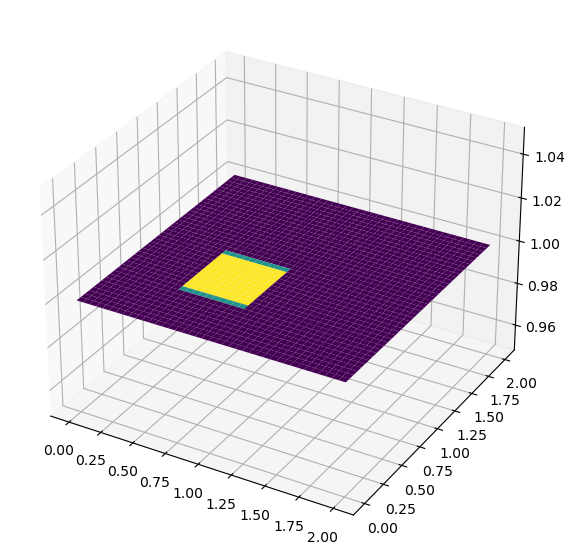

In [7]:
u = np.ones((ny,nx))
u[int(0.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)] = 2

for n in range(nt+1): #Loop across different number of timesteps
    un = u.copy()
    u[1:,1:] = (un[1:,1:] - ((c*dt/dx)*(un[1:,1:]-un[1:,-1:])) - ((c*dt/dy)*(un[1:,1:]-un[-1:,1:])))
    
    #u[0,:] = 1
    #u[-1,:] = 1
    #u[:,0] = 1
    #u[:,-1] = 1
    
fig = plt.figure(figsize=(11,7),dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,u[:],cmap=cm.viridis)

In [6]:
print(u)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


We evaluate and plot the function values again; however, this time we use nested for-loops:

C:\Users\rajat\AppData\Local\Temp\ipykernel_19772\2725101409.py:17: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


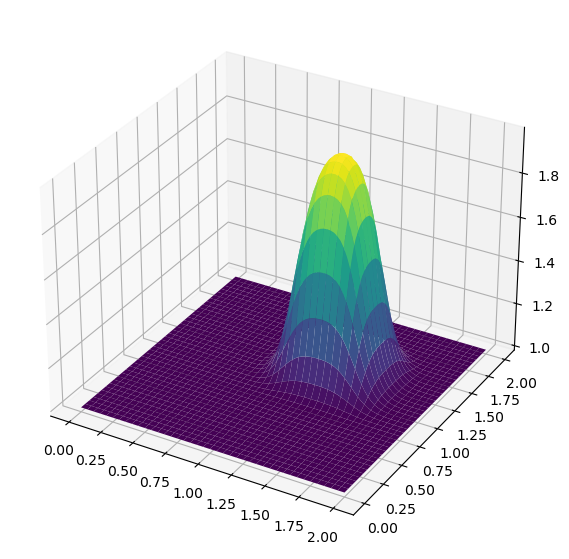

In [9]:
u = np.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    row, col = u.shape
    for j in range(1, row):
        for i in range(1, col):
            u[j, i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i - 1])) -
                                  (c * dt / dy * (un[j, i] - un[j - 1, i])))
            u[0, :] = 1
            u[-1, :] = 1
            u[:, 0] = 1
            u[:, -1] = 1

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)